In [1]:
# Import required libraries
import pandas as pd

In [6]:
# Read the data from the csv file
url = 'https://raw.githubusercontent.com/duochen/Python-DataScience/master/Lecture08/Projects/NCHS.csv'
data=pd.read_csv(url)
data.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8


In [7]:
# Check the rows and columns
data.shape

(15028, 6)

In [8]:
# Remove all rows with na cases
data = data.dropna()

In [9]:
# Check the rows and columns again
data.shape

(14917, 6)

In [10]:
# Approximately 14917 death cases were recorded in different U.S. states.
# What were the causes of death in this dataset?
causes = data['Cause Name'].unique()
causes

array(['Unintentional Injuries', 'All Causes', "Alzheimer's disease",
       'Homicide', 'Stroke', 'Chronic liver disease and cirrhosis',
       'CLRD', 'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [11]:
# Remove 'All Causes' from the Cause Name column
data = data[data['Cause Name'] != 'All Causes']
causes = data['Cause Name'].unique()
causes

array(['Unintentional Injuries', "Alzheimer's disease", 'Homicide',
       'Stroke', 'Chronic liver disease and cirrhosis', 'CLRD',
       'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [12]:
# How many death causes according to the data set?
len(causes)

16

In [14]:
# Find all the states
states = data['State'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [15]:
# Remove "United States"
data1 = data[data['State'] != 'United States']
states = data1['State'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [16]:
# How many states in the data set?
len(states)

51

In [17]:
# What was the total number of deaths in the United States from 1999 to 2015?
data['Deaths'].sum()

69279057.0

In [18]:
# What is the number of deaths for each year from 1999 to 2015?
dyear = data.groupby(['Year']).sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,4052876.0,38550.3
2000,4054097.0,38136.3
2001,4063971.0,37645.3
2002,4104796.0,37503.0
2003,4097245.0,36904.3
2004,3999321.0,35359.7
2005,4062908.0,35368.7
2006,3990647.0,34113.0
2007,3979212.0,33405.3


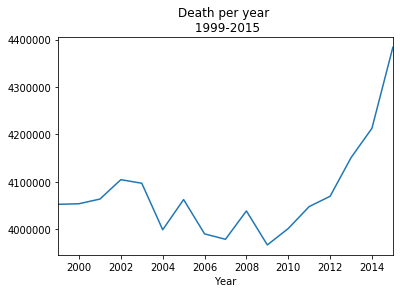

In [21]:
# Plot deaths per yer
dyear["Deaths"].plot(title="Death per year \n 1999-2015")

In [22]:
# Which ten states had the highest number fo deaths overall?
data1 = data[data["State"] != "United States"]
dataset2 = data1.groupby("State").sum()
dataset2.sort_values("Deaths", ascending=False,inplace=True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,545904,3422459.0,10101.2
Florida,545904,2397507.0,10156.8
Texas,545904,2270961.0,11339.7
New York,545904,2170019.0,10226.5
Pennsylvania,545904,1785982.0,11334.1
Ohio,545904,1529552.0,11931.3
Illinois,545904,1460489.0,11170.8
Michigan,545904,1248155.0,11645.7
North Carolina,545904,1063835.0,11737.3


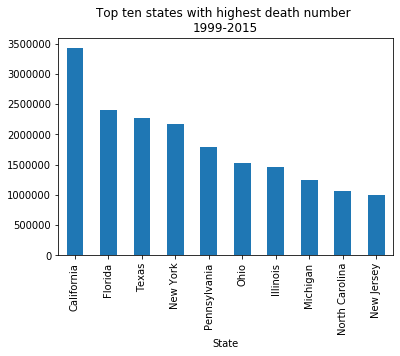

In [23]:
# Plot top ten states with highest death number
dataset2["Deaths"].head(10).plot.bar(title="Top ten states with highest death number \n1999-2015")

In [24]:
# What were the top causes of deaths in the United States during this period?
dataset1 = data[data["Cause Name"] != "All Causes"]
dataset2 = dataset1.groupby("Cause Name").sum()
dataset2.sort_values("Deaths", ascending=False, inplace=True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Diseases of Heart,1774188,21879846.0,178315.3
Cancer,1774188,19292996.0,160163.8
Stroke,1774188,4875996.0,41458.8
CLRD,1774188,4560260.0,39545.5
Unintentional Injuries,1774188,4033020.0,37368.6
Alzheimer's disease,1774188,2514618.0,21435.6
Diabetes,1774188,2472642.0,20851.9
Influenza and pneumonia,1774188,1974864.0,16498.5
Kidney Disease,1774188,1515868.0,12555.4


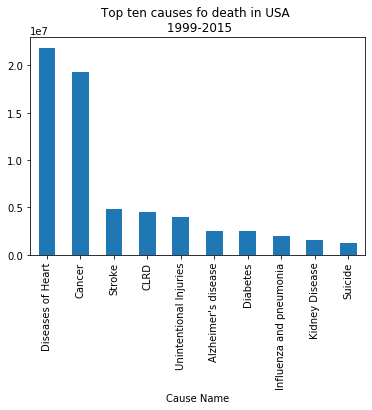

In [25]:
# Plot the top causes of deaths in the United States
dataset2["Deaths"].head(10).plot.bar(title="Top ten causes fo death in USA \n 1999-2015")